In [1]:
import sys
sys.path.append("..")

from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt
import ipywidgets as ipw
import numpy as np 
from tqdm.notebook import tqdm

from imitative_agent import ImitativeAgent
from lib.dataset_wrapper import Dataset
from lib import utils
from lib import abx_utils

ABX_NB_SAMPLES = 200
distance = {
        "art_estimated": {
            "metric": "cosine",
            "weight": 1,
        },
    }

basenames = ['0', '0.01', '0.1', '1']

# Create alias
agents_alias = {}
for basename in basenames:
    agent_path = agents_path / basename
    agent = ImitativeAgent.reload(str(agent_path), load_nn=False)
    config = agent.config
        
    agent_alias = " ".join((
        f"{','.join(config['dataset']['names'])}",
        f"jerk_loss_weight={config['training']['jerk_loss_weight']}",
        f"discriminator_loss_weight={config['training']['discriminator_loss_weight']}",
        f"path={agent_path}",
    ))
    agents_alias[agent_alias] = agent_path
    
# Compute ABX 
agents_abx_matrices = utils.pickle_load(agents_path / 'abx_cache.pickle', {})
for agent_alias, agent_path in tqdm(agents_alias.items()):
    if agent_path not in agents_abx_matrices:
        agents_abx_matrices[agent_path] = {}
    agent_abx_matrices = agents_abx_matrices[agent_path]
    
    distance_signature = abx_utils.get_distance_signature(distance)
    if distance_signature in agent_abx_matrices: continue
        
    agent = ImitativeAgent.reload(str(agent_path))
    
    main_dataset = agent.get_main_dataset()
    agent_lab = agent.get_datasplit_lab(2)
    agent_features = agent.repeat_datasplit(2)
    
    consonants = main_dataset.phones_infos["consonants"]
    vowels = main_dataset.phones_infos["vowels"]
    consonants_indexes = abx_utils.get_datasets_phones_indexes(agent_lab, consonants, vowels)
    abx_matrix = abx_utils.get_abx_matrix(consonants, consonants_indexes, agent_features, distance, ABX_NB_SAMPLES, seed=43)
    print(abx_utils.get_groups_score(consonants, abx_matrix, main_dataset.phones_infos["consonant_groups"]))
    agent_abx_matrices[distance_signature] = abx_matrix
    utils.pickle_dump(agents_path / 'abx_cache.pickle', agents_abx_matrices)
    

/home/engaclew/miniconda3/envs/agent/lib/python3.7/site-packages/torch/nn/modules/rnn.py:70: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


  0%|          | 0/4 [00:00<?, ?it/s]

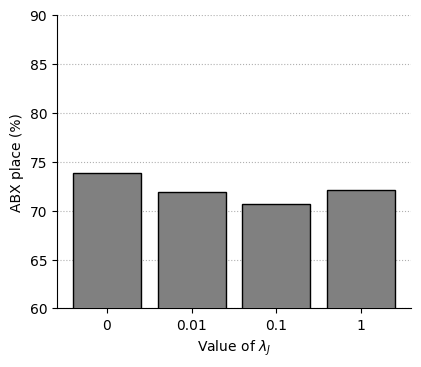

In [65]:
abx_manner = []
abx_place = []
abx_global = []
for basename in basenames:
    agent_path = agents_path / basename
    distance_signature = abx_utils.get_distance_signature(distance)
    agent_abx_matrix = agents_abx_matrices[agent_path][distance_signature]
    groups_score = abx_utils.get_groups_score(consonants, agent_abx_matrix, main_dataset.phones_infos["consonant_groups"])
    global_score = abx_utils.get_global_score(agent_abx_matrix)
    abx_manner.append(groups_score['manner'])
    abx_place.append(groups_score['place'])
    abx_global.append(global_score)
    
x = [0, 1, 2, 3]
weights = [0, 0.01, 0.1, 1]

cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(10.4*cm,9.04*cm), constrained_layout=True)
ax.bar(x=x, height=abx_place, color='grey',
       error_kw=dict(lw=1.5, capsize=8, capthick=1.5), edgecolor='black',zorder=3)
ax.set_ylabel("ABX place (%)")
ax.set_xticks(ticks=x, labels=weights)
ax.set_xlabel("Value of $\lambda_J$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(visible=True, axis='y', linestyle=':',zorder=0)
ax.set_ylim(60, 90)
plt.savefig('/home/engaclew/agent/out/imitative_agent/abx_place_jerk.png', dpi=300)
plt.show()




In [9]:
import sys
sys.path.append("..")

from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt
import ipywidgets as ipw
import numpy as np 
from tqdm.notebook import tqdm

from imitative_agent import ImitativeAgent
from lib.dataset_wrapper import Dataset
from lib import utils
from lib import abx_utils

ABX_NB_SAMPLES = 200
distance = {
        "art_estimated": {
            "metric": "cosine",
            "weight": 1,
        },
    }

agents_path = Path("../out/imitative_agent/dynamic_GAN_varying_frames_2_layers")
basenames = list(range(1, 11))

# Create alias
agents_alias = {}
for basename in basenames:
    agent_path = agents_path / str(basename)
    agent = ImitativeAgent.reload(str(agent_path), load_nn=False)
    config = agent.config
        
    agent_alias = " ".join((
        f"{','.join(config['dataset']['names'])}",
        f"jerk_loss_weight={config['training']['jerk_loss_weight']}",
        f"discriminator_loss_weight={config['training']['discriminator_loss_weight']}",
        f"path={agent_path}",
    ))
    agents_alias[agent_alias] = agent_path
    
# Compute ABX 
agents_abx_matrices = utils.pickle_load(agents_path / 'abx_cache.pickle', {})
for agent_alias, agent_path in tqdm(agents_alias.items()):
    if agent_path not in agents_abx_matrices:
        agents_abx_matrices[agent_path] = {}
    agent_abx_matrices = agents_abx_matrices[agent_path]
    
    distance_signature = abx_utils.get_distance_signature(distance)
    if distance_signature in agent_abx_matrices: continue
        
    agent = ImitativeAgent.reload(str(agent_path))
    
    main_dataset = agent.get_main_dataset()
    agent_lab = agent.get_datasplit_lab(2)
    agent_features = agent.repeat_datasplit(2)
    
    consonants = main_dataset.phones_infos["consonants"]
    vowels = main_dataset.phones_infos["vowels"]
    consonants_indexes = abx_utils.get_datasets_phones_indexes(agent_lab, consonants, vowels)
    abx_matrix = abx_utils.get_abx_matrix(consonants, consonants_indexes, agent_features, distance, ABX_NB_SAMPLES, seed=43)
    print(abx_utils.get_groups_score(consonants, abx_matrix, main_dataset.phones_infos["consonant_groups"]))
    agent_abx_matrices[distance_signature] = abx_matrix
    utils.pickle_dump(agents_path / 'abx_cache.pickle', agents_abx_matrices)
    

  0%|          | 0/10 [00:00<?, ?it/s]

{'manner': 73.15833333333333, 'place': 71.41666666666666}
{'manner': 70.74166666666666, 'place': 71.72916666666667}
{'manner': 70.96666666666667, 'place': 72.16666666666667}
{'manner': 68.0, 'place': 72.89583333333334}
{'manner': 70.46666666666667, 'place': 71.45833333333333}
{'manner': 69.63333333333334, 'place': 70.47916666666667}
{'manner': 67.20833333333334, 'place': 66.83333333333333}
{'manner': 67.60833333333332, 'place': 69.16666666666667}
{'manner': 68.75833333333333, 'place': 70.10416666666666}
{'manner': 66.60833333333333, 'place': 72.375}


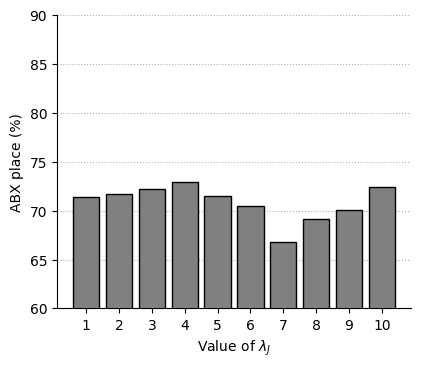

In [10]:
abx_manner = []
abx_place = []
abx_global = []
for basename in basenames:
    agent_path = agents_path / str(basename)
    distance_signature = abx_utils.get_distance_signature(distance)
    agent_abx_matrix = agents_abx_matrices[agent_path][distance_signature]
    groups_score = abx_utils.get_groups_score(consonants, agent_abx_matrix, main_dataset.phones_infos["consonant_groups"])
    global_score = abx_utils.get_global_score(agent_abx_matrix)
    abx_manner.append(groups_score['manner'])
    abx_place.append(groups_score['place'])
    abx_global.append(global_score)
    
x = range(0,10)
weights = range(1,11)

cm = 1/2.54
fig, ax = plt.subplots(1, 1, figsize=(10.4*cm,9.04*cm), constrained_layout=True)
ax.bar(x=x, height=abx_place, color='grey',
       error_kw=dict(lw=1.5, capsize=8, capthick=1.5), edgecolor='black',zorder=3)
ax.set_ylabel("ABX place (%)")
ax.set_xticks(ticks=x, labels=weights)
ax.set_xlabel("Value of $\lambda_J$")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(visible=True, axis='y', linestyle=':',zorder=0)
ax.set_ylim(60, 90)
#plt.savefig('/home/engaclew/agent/out/imitative_agent/abx_place_dynamic_GAN_varying_frames.png', dpi=300)
plt.show()